In [1]:
import numpy as np
import hashlib as hl
import math
import mmh3
from bitarray import bitarray
import random 
import matplotlib.pyplot as plt

In [2]:
hl.md5('mauricio'.encode('utf-8')).hexdigest()

'110eff7d40a3779f4513c1be6f8fffcf'

In [3]:
lugares = [1,2,3,100]
for l in lugares:
    print(l)

1
2
3
100


In [4]:
bloom = np.zeros(1000,dtype=bool)

In [5]:
for l in lugares: 
    bloom[l] = True

In [6]:
def inserta (dato):
    lugar = calcularHash(dato, m, k)
    for l in lugares:
        filtro[l] = True


In [7]:
m = 257
k = 4
dato = 'fer'
bits = np.ceil(np.log2(m))
caracteres_hexa = int(np.ceil(bits/4))
hash = hl.md5('fer'.encode('utf-8')).hexdigest()

In [8]:
# Tomar caracteres_hexa k veces
res = []
for i in range(0,k*caracteres_hexa,caracteres_hexa):
    res += [int(hash[i:i+caracteres_hexa],16)%m]

In [9]:
res

[5, 124, 6, 134]

#### CLASE BLOOM FILTER

In [10]:
class BloomFilter:
    def __init__(self,m,k=1):
        self.bits = np.ceil(np.log2(m))
        self.caracteres_hexa = int(np.ceil(self.bits/4))
        self.numMD5 = np.ceil(k*self.caracteres_hexa/128)
        self.m = m
        self.k = k
        self.bloom = np.zeros(self.m,dtype=bool)
        self.cont = 0

    def calcula_k_posiciones(self,dato):
        res = []
        hash = ''
        for i in range(int(self.numMD5)):
            hash = hl.md5(dato.encode('utf-8')).hexdigest()
        for i in range(0,self.k*self.caracteres_hexa,self.caracteres_hexa):
            res += [int(hash[i:i+self.caracteres_hexa],16)%self.m]
        return res
    
    def inserta(self,dato):
        res = self.calcula_k_posiciones(dato)
        for i in res:
            self.bloom[i]=True
        self.cont += 1
    
    def busca(self,dato):
        res = self.calcula_k_posiciones(dato)
        esta = True
        for i in res:
            esta = esta and self.bloom[i]
        return esta

In [11]:
# Creando BloomFilter
bm = BloomFilter(4,2)

In [12]:
# Calculando k posiciones
bm.calcula_k_posiciones('fer')

[1, 0]

In [13]:
# Insertando datos
bm.inserta('fer')
bm.inserta('fer1')
bm.inserta('fer2')
bm.inserta('fer4')

In [14]:
# Buscando datos
bm.busca('mau')

False

In [15]:
# Generando Strings Aleatorios
def generaStringAlAzar(n):
    res=''
    for i in range(n):
        res += chr(random.randint(65,91))
    return res

In [16]:
for i in range(10):
    strpru = generaStringAlAzar(5)
    print(strpru,bm.busca(strpru))

STOWN True
QSOKL True
BYKHW False
WVINJ True
POEYF True
MLQHL True
OW[LW True
QSDUP True
QYO[V False
TQTCR False


##### Tarea experimento Bloom filters

> Hacer un programa para determinar experimentalmente el tamaño mínimo m de un Bloom Filter, dado el número de elementos a almacenar n y un porcentaje f de falsos positivos máximo aceptable.

In [19]:
def calculaM(n,p):
    valores_m=[]
    k=1 ## inicio valor de k´s
    for e in range(10):
        flag=True
        resta=0
        while(flag):
            ocupado=n*k ## aqui veo el total del arreglo ocupado en el peor caso
            #print(ocupado)
            otra_p=1-p ## lo ocupado representaria un porcentaje dle arreglo total
            #print(otra_p)
            valorM=math.ceil(ocupado*100/(otra_p*100))-resta ##calculo la regla de tres y le pongo funcion techo, además voy en disminución
            #print(valorM)
            bloo=BloomFilter(valorM,k) ## creo el experimento 
            prob_ACUMULADA=0
            for l in range(100): ##hago el experimento 100 veces
                for i in range(n):
                    strpru=generaStringAlAzar(10)
                    #print(strpru,bloo.calcula_k_posiciones(strpru))
                    bloo.inserta(strpru)
                cont=0
                for j in range(100):    
                    for r in range(n):
                        strpru=generaStringAlAzar(10)
                        #print(strpru,bloo.busca(strpru))
                        if(bloo.busca(strpru)==False): ## cuento los falsos del experimento
                            cont=cont+1
                promedio_Falso=cont/100    ##Saco promedio de Falsos
                #print(promedio_Falso)
                prob_sacada=promedio_Falso/n  ## Saco el porcentaje de los falsos
                #print(prob_sacada)
                prob_ACUMULADA=prob_ACUMULADA+prob_sacada ## voy sumando todas las probabilidades del falso
                bloo=BloomFilter(valorM,k) ## reinicio el experimento
            prob_FINAL=prob_ACUMULADA/100  ##Obtengo el promedio de todos los 100 experimentos
            #print("PROBABILIDAD FINAL:"+str(prob_FINAL))
            if(prob_FINAL<=p): ## Si con la M propuesta se cumple que el porcentaje es menor al dado acabo
                flag=False

            resta=resta+1 ## Aqui incremento el valor de la resta para la M que no funciono
        print("El valor de M para "+str(k)+" funciones de Hash con "+str(n)+" datos y con "+str(p)+" procentaje de falsos es: "+str(valorM))
        valores_m.append(valorM)
        k=k+1 
    return valores_m    

In [20]:
n=5
p=0.4
valores_m=calculaM(n,p)

El valor de M para 1 funciones de Hash con 5 datos y con 0.4 procentaje de falsos es: 6
El valor de M para 2 funciones de Hash con 5 datos y con 0.4 procentaje de falsos es: 7
El valor de M para 3 funciones de Hash con 5 datos y con 0.4 procentaje de falsos es: 9
El valor de M para 4 funciones de Hash con 5 datos y con 0.4 procentaje de falsos es: 10
El valor de M para 5 funciones de Hash con 5 datos y con 0.4 procentaje de falsos es: 11
El valor de M para 6 funciones de Hash con 5 datos y con 0.4 procentaje de falsos es: 12
El valor de M para 7 funciones de Hash con 5 datos y con 0.4 procentaje de falsos es: 14
El valor de M para 8 funciones de Hash con 5 datos y con 0.4 procentaje de falsos es: 16
El valor de M para 9 funciones de Hash con 5 datos y con 0.4 procentaje de falsos es: 16
El valor de M para 10 funciones de Hash con 5 datos y con 0.4 procentaje de falsos es: 17


In [21]:
valores_k=[]
for i in range(1,11):
    valores_k.append(i)

Text(0.5, 1.0, 'Relación entre el tamaño del arreglo y las funciones de hash dado 5 datos y con probabilidad de 0.4 falsos positivos')

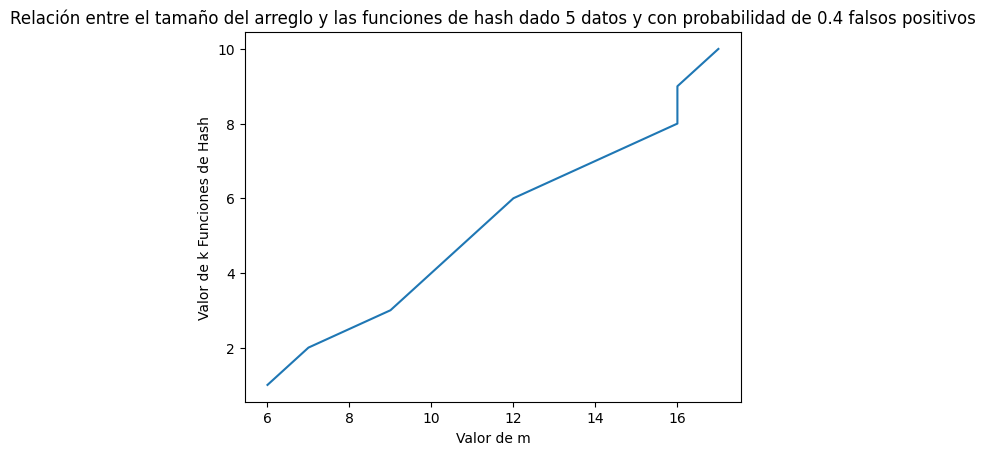

In [22]:
# Ploteando
plt.plot(valores_m, valores_k)
plt.xlabel('Valor de m')
plt.ylabel('Valor de k Funciones de Hash')
plt.title("Relación entre el tamaño del arreglo y las funciones de hash dado "+str(n)+" datos y con probabilidad de "+str(p)+" falsos positivos")

##### Relacion enre k y el valor de falsos positivos

> Esta es una relación que depende del valor de la M y de los N datos. Pero es evidente que es una función decreciente pues entre más funciones de Hash se aplique a los datos menos Falsos van a haber 

In [24]:
# Relacion M y n datos
falso=[]
for k in range(1,30):
    bloom=BloomFilter(10,k)
    #print(k)
    tot_F=0
    for s in range(20):
        cont=0
        bloom=BloomFilter(10,k)
        for r in range(5):
            strpru=generaStringAlAzar(10)
            bloom.inserta(strpru)
        for j in range(10):
            for i in range(5):
                strpru=generaStringAlAzar(5)
                if(bloom.busca(strpru)==False):
                    cont=cont+1
        #print((cont/2))
        promedio=(cont/10)
        tot_F=tot_F+promedio
    #print(tot_F/10)
    falso.append(tot_F/20)
falso

[2.9099999999999993,
 2.99,
 1.9000000000000004,
 1.9900000000000007,
 1.52,
 1.51,
 1.2899999999999998,
 0.65,
 0.65,
 0.52,
 0.38,
 0.135,
 0.0,
 0.285,
 0.13999999999999999,
 0.16999999999999998,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [25]:
val_k=[]
for i in range(1,30):
    val_k.append(i)

Text(0.5, 1.0, 'Relacion entre K y el valor de Falsos postivos dado una m de 10 y 5 datos')

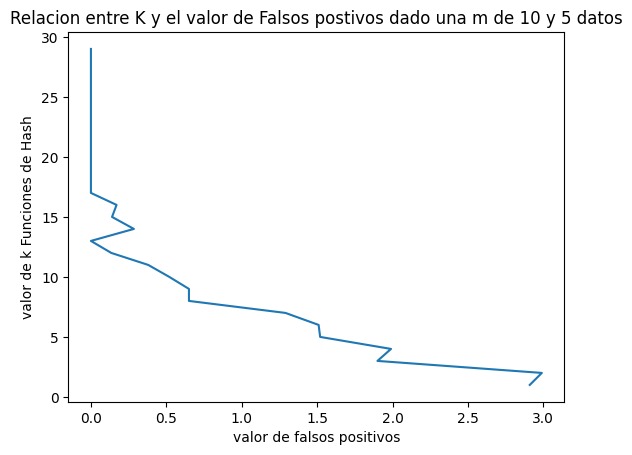

In [26]:
# Ploteando
plt.plot(falso, val_k)
plt.xlabel('Valor de falsos positivos')
plt.ylabel('Valor de k Funciones de Hash')
plt.title("Relacion entre K y el valor de Falsos postivos dado una m de 10 y 5 datos")